# COVID-19 Pandemic by the Numbers

by Nadir Sarigul

See https://nadir-nyc62.medium.com/what-do-the-numbers-of-the-covid-19-pandemic-tell-us-f40cfbd371b for description




# Data Preparation

The data used in this analysis can be found at https://datacatalog.worldbank.org/

In [246]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np 
import plotly.offline as  pyo
import plotly.graph_objs as go

obesity = pd.read_csv("Data/obesity.csv")
diabetes = pd.read_csv("Data/diabetes.csv")
gdp = pd.read_excel(r"Data/Income_world_bank.xls")

populations = pd.read_csv("Data/Populations.csv")
years = pd.read_excel(r"Data/65_year_above.xls", header= 1)
covid = pd.read_excel(r"Data/COVID19 data.xlsx")

import warnings 
warnings.filterwarnings('ignore')




In [247]:
# drop features that we dont need on the gdp dataset
gdp = gdp.drop(["Region","country"], axis= 1)
# merge gdp and diabetes dataset
df = gdp.merge(diabetes,  how='inner', on='Country Code' )

In [248]:
df

,Country Code,IncomeGroup,Country Name,% Diabetes
0,ABW,High income,Aruba,11.6
1,AFG,Low income,Afghanistan,9.2
2,AGO,Lower middle income,Angola,4.5
3,ALB,Upper middle income,Albania,9.0
4,AND,High income,Andorra,7.7
...,...,...,...,...
258,XKX,Upper middle income,Kosovo,NaN
259,YEM,Low income,"Yemen, Rep.",5.4
260,ZAF,Upper middle income,South Africa,12.7
261,ZMB,Lower middle income,Zambia,4.5


In [249]:
# get features we needs from populations dataset
populations =populations[["name","pop2021"]]
populations = populations.rename({"name":"Country Name"}, axis = 1)

In [250]:
# merge df and populations dataset
df = df.merge(populations,  how='inner', on='Country Name' )

In [251]:
df["IncomeGroup"].value_counts()

High income            71
Upper middle income    49
Lower middle income    41
Low income             24
Name: IncomeGroup, dtype: int64

In [252]:
# drop Country Name feature from years dataset
years = years.drop("Country Name", axis =1)

In [253]:
# merge years with df
df = df.merge(years,  how='inner', on='Country Code' )

In [254]:
df

,Country Code,IncomeGroup,Country Name,% Diabetes,pop2021,% pop > 65 years
0,ABW,High income,Aruba,11.6,107.204,14.058355
1,AFG,Low income,Afghanistan,9.2,39835.428,2.615794
2,AGO,Lower middle income,Angola,4.5,33933.610,2.199342
3,ALB,Upper middle income,Albania,9.0,2872.933,14.202631
4,AND,High income,Andorra,7.7,77.355,NaN
...,...,...,...,...,...,...
180,VUT,Lower middle income,Vanuatu,11.9,314.464,3.616089
181,WSM,Upper middle income,Samoa,9.2,200.149,4.933104
182,ZAF,Upper middle income,South Africa,12.7,60041.994,5.415256
183,ZMB,Lower middle income,Zambia,4.5,18920.651,2.115315


In [255]:
#Drop pop2021 feature from obesity
obesity =obesity.drop("pop2021", axis =1)
# change country column name to Country Name
obesity = obesity.rename({'country': 'Country Name'}, axis=1)

In [256]:
#merge obesity to df dataset
df = df.merge(obesity,  how='inner', on='Country Name' )

In [257]:
# drop features we dont need 
covid = covid.drop(["continent","date"], axis=1)
# rename location column to Country Name
covid = covid.rename({"location":"Country Name" }, axis =1)
covid

,Country Name,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million
0,Afghanistan,58312.0,2561.0,1497.932,65.788
1,Africa,4474950.0,119227.0,3338.025,88.936
2,Albania,130114.0,2364.0,45213.010,821.461
3,Algeria,120363.0,3181.0,2744.815,72.541
4,Andorra,12942.0,123.0,167501.456,1591.924
...,...,...,...,...,...
202,Vietnam,2824.0,35.0,29.012,0.360
203,World,144742651.0,3071857.0,18569.133,394.091
204,Yemen,6020.0,1157.0,201.838,38.792
205,Zambia,91189.0,1240.0,4960.249,67.450


In [258]:
# merge covid data with df
df = df.merge(covid,how='inner', on='Country Name')
df

,Country Code,IncomeGroup,Country Name,% Diabetes,pop2021,% pop > 65 years,obesityRate,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million
0,AFG,Low income,Afghanistan,9.2,39835.428,2.615794,5.5,58312.0,2561.0,1497.932,65.788
1,AGO,Lower middle income,Angola,4.5,33933.610,2.199342,8.2,25051.0,572.0,762.210,17.404
2,ALB,Upper middle income,Albania,9.0,2872.933,14.202631,21.7,130114.0,2364.0,45213.010,821.461
3,AND,High income,Andorra,7.7,77.355,NaN,25.6,12942.0,123.0,167501.456,1591.924
4,ARE,High income,United Arab Emirates,16.3,9991.089,1.156549,31.7,504872.0,1565.0,51046.672,158.234
...,...,...,...,...,...,...,...,...,...,...,...
153,VUT,Lower middle income,Vanuatu,11.9,314.464,3.616089,25.2,4.0,1.0,13.023,3.256
154,WSM,Upper middle income,Samoa,9.2,200.149,4.933104,47.3,3.0,NaN,15.120,NaN
155,ZAF,Upper middle income,South Africa,12.7,60041.994,5.415256,28.3,1571348.0,53995.0,26494.397,910.406
156,ZMB,Lower middle income,Zambia,4.5,18920.651,2.115315,8.1,91189.0,1240.0,4960.249,67.450


In [259]:
# check null values
df.isna().sum()

Country Code                0
IncomeGroup                 0
Country Name                0
% Diabetes                  0
pop2021                     0
% pop > 65 years            4
obesityRate                 0
total_cases                 0
total_deaths                4
total_cases_per_million     0
total_deaths_per_million    4
dtype: int64

In [260]:
# drop Nan values from dataset
df.dropna(inplace=True)

In [261]:
# check summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Code              152 non-null    object 
 1   IncomeGroup               152 non-null    object 
 2   Country Name              152 non-null    object 
 3   % Diabetes                152 non-null    float64
 4   pop2021                   152 non-null    float64
 5   % pop > 65 years          152 non-null    float64
 6   obesityRate               152 non-null    float64
 7   total_cases               152 non-null    float64
 8   total_deaths              152 non-null    float64
 9   total_cases_per_million   152 non-null    float64
 10  total_deaths_per_million  152 non-null    float64
dtypes: float64(8), object(3)
memory usage: 14.2+ KB


In [262]:
#Group the data to see the features for each variable by Income Group
df.groupby(["IncomeGroup"]).mean()

,% Diabetes,pop2021,% pop > 65 years,obesityRate,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million
IncomeGroup,,,,,,,,
High income,8.148980,23206.738633,15.586920,23.669388,1.442796e+06,28840.346939,55275.869571,888.084245
Low income,5.426087,23094.690696,2.946712,8.030435,2.974796e+04,619.652174,1136.439870,22.810565
Lower middle income,7.010526,74592.615132,5.298321,13.339474,6.299453e+05,8993.947368,8465.799184,191.401263
Upper middle income,9.109524,63376.708690,8.804383,21.978571,9.297726e+05,25124.714286,36284.253452,712.003143


In [263]:
gdp_df = df.copy()

In [264]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Code              152 non-null    object 
 1   IncomeGroup               152 non-null    object 
 2   Country Name              152 non-null    object 
 3   % Diabetes                152 non-null    float64
 4   pop2021                   152 non-null    float64
 5   % pop > 65 years          152 non-null    float64
 6   obesityRate               152 non-null    float64
 7   total_cases               152 non-null    float64
 8   total_deaths              152 non-null    float64
 9   total_cases_per_million   152 non-null    float64
 10  total_deaths_per_million  152 non-null    float64
dtypes: float64(8), object(3)
memory usage: 14.2+ KB


# Total COVID-19 Cases and Deaths

## Top 25 Countries

In [265]:
df_cases = gdp_df.copy()
cases = df_cases.sort_values(by=['total_cases'], ascending = False)
cases_top25 = cases.head(25)

In [266]:
cases_top25

,Country Code,IncomeGroup,Country Name,% Diabetes,pop2021,% pop > 65 years,obesityRate,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million
150,USA,High income,United States,10.8,332915.073,16.209606,36.2,31929351.0,570345.0,96462.525,1723.083
67,IND,Lower middle income,India,10.4,1393409.038,6.377924,3.9,16263695.0,186920.0,11785.249,135.449
22,BRA,Upper middle income,Brazil,10.4,213993.437,9.251608,22.1,14167973.0,383502.0,66654.179,1804.211
50,FRA,High income,France,4.8,65426.179,20.391370,21.6,5469674.0,102323.0,80262.064,1501.489
145,TUR,Upper middle income,Turkey,11.1,85042.738,8.726284,32.1,4501382.0,37329.0,53372.442,442.606
52,GBR,High income,United Kingdom,3.9,68207.116,18.508696,27.8,4413834.0,127597.0,65018.321,1879.577
72,ITA,High income,Italy,5.0,60367.477,23.012137,19.9,3920945.0,118357.0,64849.925,1957.549
45,ESP,High income,Spain,6.9,46745.216,19.647823,23.8,3456886.0,77496.0,73936.521,1657.499
37,DEU,High income,Germany,10.4,83900.473,21.562992,22.3,3254609.0,81203.0,38845.258,969.195
5,ARG,Upper middle income,Argentina,5.9,45605.826,11.243108,28.3,2796768.0,60620.0,61881.180,1341.276


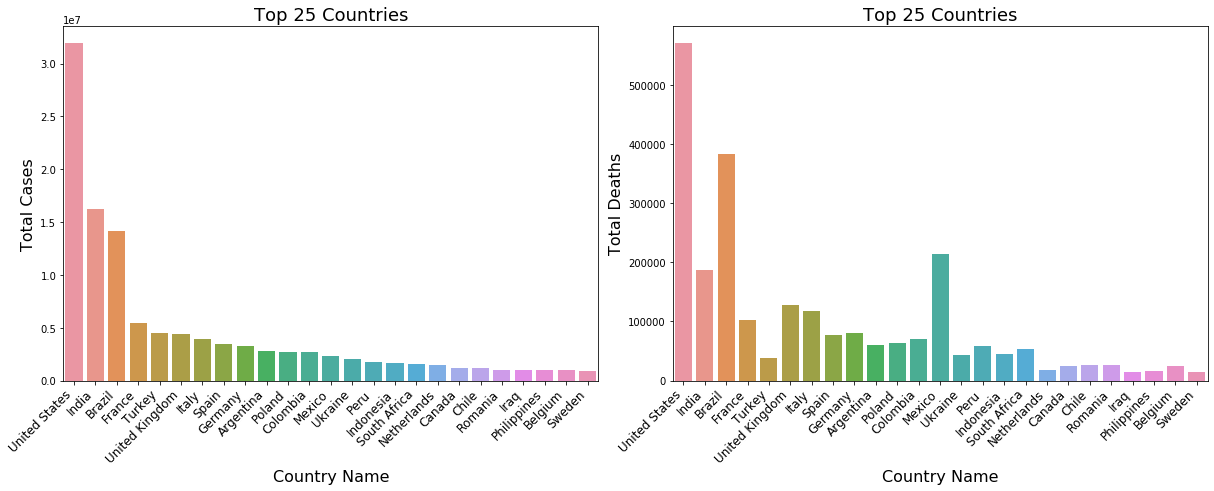

In [267]:
#Here you can see an overview of the total COVID-19 cases and deaths (sorted by total cases) of the top 25 countries

plt.rcParams['figure.figsize'] = [8,8]
fig = plt.figure(figsize=(17,12))
ax1 = fig.add_subplot(221)


sns.barplot(cases_top25["Country Name"],cases_top25["total_cases"])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, 
                   horizontalalignment='right',
                  fontweight='light',
                  fontsize='12')
ax1.set_xlabel("Country Name", size= 16)
ax1.set_ylabel("Total Cases", size= 16)
ax1.set_title("Top 25 Countries", size= 18)

ax2 = fig.add_subplot(222)
sns.barplot(cases_top25["Country Name"],cases_top25["total_deaths"])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, 
                   horizontalalignment='right',
                  fontweight='light',
                  fontsize='12')

ax2 = fig.add_subplot(222)
ax2.set_xlabel("Country Name", size= 16)
ax2.set_ylabel("Total Deaths", size= 16)
ax2.set_title("Top 25 Countries", size= 18)

fig.tight_layout()
plt.show()

 ## Bottom 25 Countries

In [268]:
df_cases = gdp_df.copy()
cases = df_cases.sort_values(by=['total_cases'], ascending = False)
cases_low25 = cases.tail(25)

In [269]:
cases_low25

,Country Code,IncomeGroup,Country Name,% Diabetes,pop2021,% pop > 65 years,obesityRate,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million
78,KHM,Lower middle income,Cambodia,6.4,16946.438,4.717769,3.9,8193.0,59.0,490.042,3.529
13,BEN,Lower middle income,Benin,1.0,12451.040,3.264885,9.6,7720.0,97.0,636.796,8.001
57,GNQ,Upper middle income,Equatorial Guinea,6.0,1449.896,2.424509,8.0,7505.0,106.0,5349.309,75.553
107,NIC,Lower middle income,Nicaragua,11.4,6702.385,5.457992,23.7,6835.0,181.0,1031.768,27.323
70,ISL,High income,Iceland,5.8,343.353,15.192121,21.9,6379.0,29.0,18693.040,84.982
26,CAF,Low income,Central African Republic,6.0,4919.981,2.814790,7.5,6175.0,85.0,1278.530,17.599
138,SYC,High income,Seychelles,12.3,98.908,7.805482,14.0,5170.0,26.0,52572.707,264.389
105,NER,Low income,Niger,2.4,25130.817,2.596711,5.5,5143.0,191.0,212.462,7.890
139,TCD,Low income,Chad,6.0,16914.985,2.491642,6.1,4735.0,169.0,288.265,10.289
129,SLE,Low income,Sierra Leone,2.4,8141.343,2.947737,8.7,4044.0,79.0,506.958,9.903


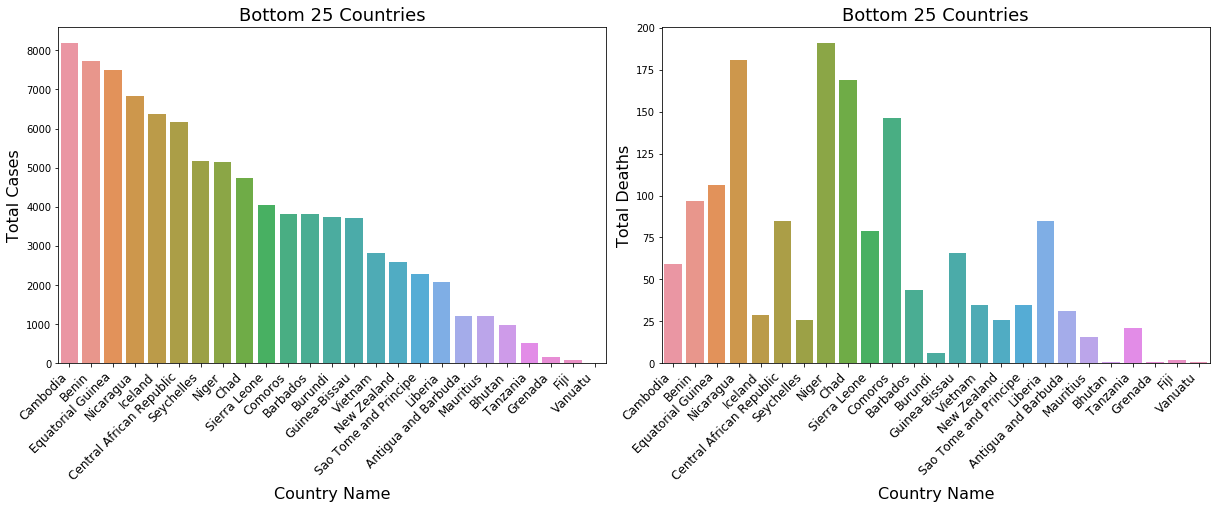

In [270]:
#Here you can see an overview of the total COVID-19 cases and deaths (sorted by total cases) of the bottom 25 countries

plt.rcParams['figure.figsize'] = [8,8]
fig = plt.figure(figsize=(17,12))
ax1 = fig.add_subplot(221)


sns.barplot(cases_low25["Country Name"],cases_low25["total_cases"])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, 
                   horizontalalignment='right',
                  fontweight='light',
                  fontsize='12')
ax1.set_xlabel("Country Name", size= 16)
ax1.set_ylabel("Total Cases", size= 16)
ax1.set_title("Bottom 25 Countries", size= 18)



ax2 = fig.add_subplot(222)
sns.barplot(cases_low25["Country Name"],cases_low25["total_deaths"])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, 
                   horizontalalignment='right',
                  fontweight='light',
                  fontsize='12')
ax2.set_xlabel("Country Name", size= 16)
ax2.set_ylabel("Total Deaths", size= 16)
ax2.set_title("Bottom 25 Countries", size= 18)

fig.tight_layout()
plt.show()

# Cases and Death per Million

## Top 25 Countries

In [271]:
df_cases = gdp_df.copy()
cases = df_cases.sort_values(by=['total_cases_per_million'], ascending = False)
cases_per_million_top25 = cases.head(25)

In [272]:
cases_per_million_top25

,Country Code,IncomeGroup,Country Name,% Diabetes,pop2021,% pop > 65 years,obesityRate,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million
97,MNE,Upper middle income,Montenegro,9.0,628.053,15.389172,23.3,96187.0,1451.0,153148.893,2310.281
136,SVN,High income,Slovenia,5.9,2078.724,20.186284,20.2,234811.0,4187.0,112947.898,2014.015
86,LUX,High income,Luxembourg,5.0,634.814,14.274949,22.6,65813.0,790.0,105136.619,1262.029
132,SRB,Upper middle income,Serbia,9.0,8697.550,18.740503,21.5,673520.0,6130.0,98980.160,900.862
17,BHR,High income,Bahrain,15.6,1748.296,2.518810,29.8,168201.0,614.0,98849.718,360.840
71,ISR,High income,Israel,9.7,8789.774,12.208674,26.1,837807.0,6346.0,96794.296,733.172
150,USA,High income,United States,10.8,332915.073,16.209606,36.2,31929351.0,570345.0,96462.525,1723.083
137,SWE,High income,Sweden,4.8,10160.169,20.198570,20.6,932076.0,13882.0,92291.423,1374.555
46,EST,High income,Estonia,4.2,1325.185,19.991808,21.2,119218.0,1120.0,89871.463,844.302
85,LTU,High income,Lithuania,3.8,2689.862,20.158413,26.3,237950.0,3818.0,87407.996,1402.495


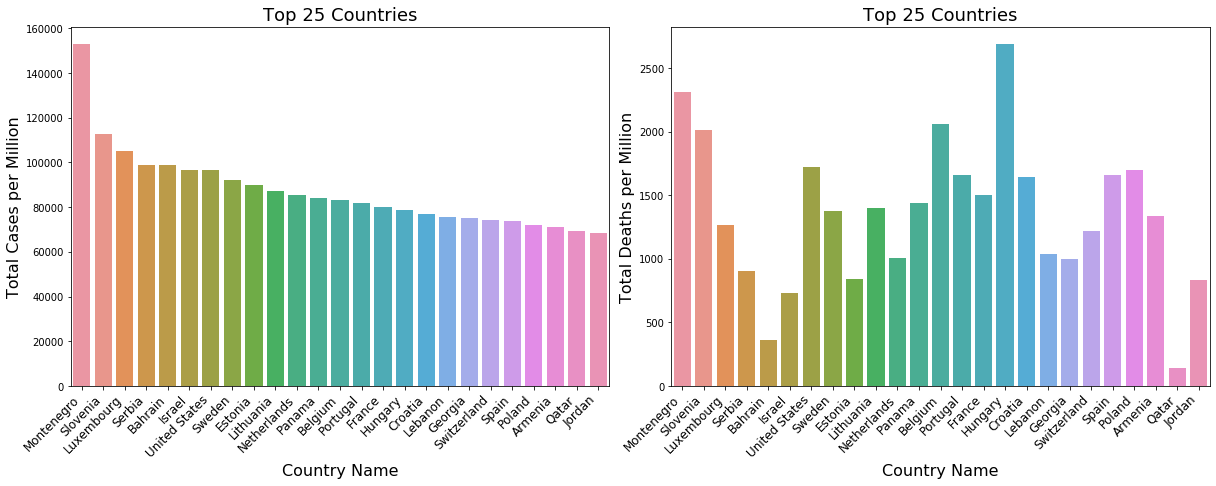

In [273]:
#Here you can see an overview of the total COVID-19 cases and deaths per million (sorted by total cases) of the top 25 countries

plt.rcParams['figure.figsize'] = [8,8]
fig = plt.figure(figsize=(17,12))
ax1 = fig.add_subplot(221)


sns.barplot(cases_per_million_top25["Country Name"],cases_per_million_top25["total_cases_per_million"])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, 
                   horizontalalignment='right',
                  fontweight='light',
                  fontsize='12')
ax1.set_xlabel("Country Name", size= 16)
ax1.set_ylabel("Total Cases per Million", size= 16)
ax1.set_title("Top 25 Countries", size= 18)



ax2 = fig.add_subplot(222)
sns.barplot(cases_per_million_top25["Country Name"],cases_per_million_top25["total_deaths_per_million"])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, 
                   horizontalalignment='right',
                  fontweight='light',
                  fontsize='12')
ax2.set_xlabel("Country Name", size= 16)
ax2.set_ylabel("Total Deaths per Million", size= 16)
ax2.set_title("Top 25 Countries", size= 18)

fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 25 Countries')

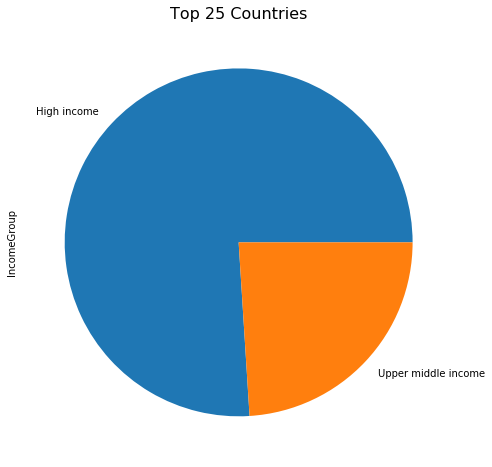

In [274]:
#Top 25 Countries Grouped by Income
pie = cases_per_million_top25[["IncomeGroup", "total_deaths_per_million"]]
pie["IncomeGroup"].value_counts().plot(kind = "pie")
plt.title("Top 25 Countries", size=16)



In [275]:
cases = cases_per_million_top25.groupby(["Country Name","IncomeGroup"])["total_cases_per_million",
                                            "total_deaths_per_million"].mean()

cm = sns.light_palette("green", as_cmap=True)
cases.style.background_gradient(cmap=cm)



,,total_cases_per_million,total_deaths_per_million
Country Name,IncomeGroup,,
Armenia,Upper middle income,71340.637000,1339.415000
Bahrain,High income,98849.718000,360.840000
Belgium,High income,83223.292000,2062.967000
Croatia,High income,77049.294000,1641.306000
Estonia,High income,89871.463000,844.302000
France,High income,80262.064000,1501.489000
Georgia,Upper middle income,75269.699000,997.951000
Hungary,High income,78772.198000,2691.517000
Israel,High income,96794.296000,733.172000


## Bottom 25 Countries

In [276]:
df_cases = gdp_df.copy()
cases = df_cases.sort_values(by=['total_cases_per_million'], ascending = False)
cases_per_million_bottom25 = cases.tail(25)

In [277]:
cases_per_million_bottom25

,Country Code,IncomeGroup,Country Name,% Diabetes,pop2021,% pop > 65 years,obesityRate,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million
64,HTI,Low income,Haiti,6.7,11541.685,5.063670,22.7,12944.0,251.0,1135.186,22.013
107,NIC,Lower middle income,Nicaragua,11.4,6702.385,5.457992,23.7,6835.0,181.0,1031.768,27.323
101,MUS,High income,Mauritius,22.0,1273.433,11.998727,10.8,1205.0,16.0,947.501,12.581
133,SSD,Low income,South Sudan,10.2,11381.378,3.376805,8.6,10504.0,114.0,938.383,10.184
147,UGA,Low income,Uganda,2.5,47123.531,1.962550,5.3,41529.0,341.0,907.916,7.455
131,SOM,Low income,Somalia,5.1,16359.504,2.889204,8.3,13459.0,689.0,846.839,43.352
106,NGA,Lower middle income,Nigeria,3.1,211400.708,2.743083,8.9,164588.0,2061.0,798.430,9.998
125,SDN,Low income,Sudan,22.1,44909.353,3.627317,8.6,33599.0,2300.0,766.239,52.452
1,AGO,Lower middle income,Angola,4.5,33933.610,2.199342,8.2,25051.0,572.0,762.210,17.404
141,THA,Upper middle income,Thailand,7.0,69950.850,12.406250,10.0,48113.0,117.0,689.298,1.676


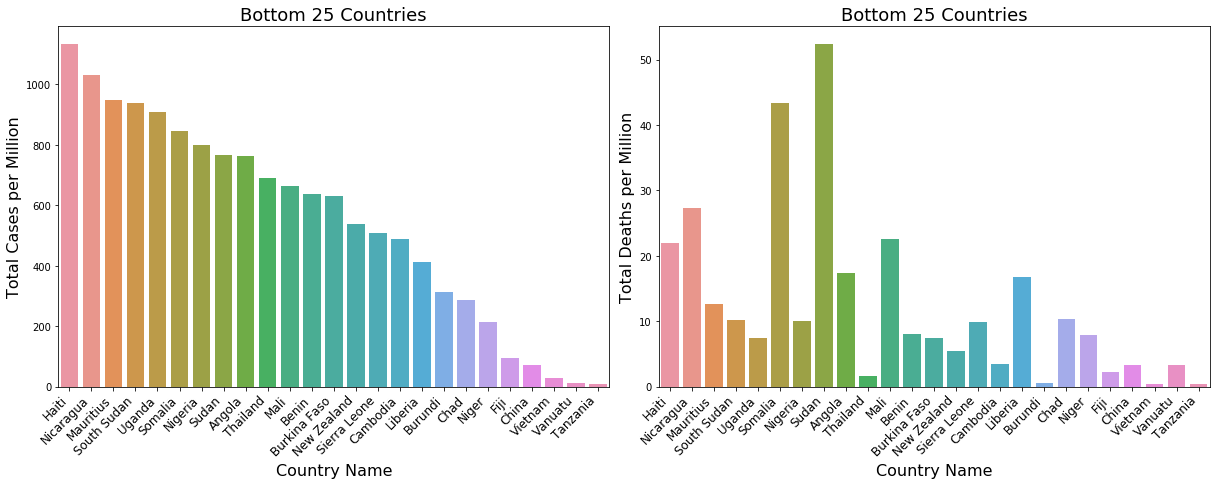

In [278]:
#Here you can see an overview of the total COVID-19 cases and deaths per million (sorted by total cases) of the top 25 countries

plt.rcParams['figure.figsize'] = [8,8]
fig = plt.figure(figsize=(17,12))
ax1 = fig.add_subplot(221)


sns.barplot(cases_per_million_bottom25["Country Name"],cases_per_million_bottom25["total_cases_per_million"])

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, 
                   horizontalalignment='right',
                  fontweight='light',
                  fontsize='12')
ax1.set_xlabel("Country Name", size= 16)
ax1.set_ylabel("Total Cases per Million", size= 16)
ax1.set_title("Bottom 25 Countries", size= 18)



ax2 = fig.add_subplot(222)
sns.barplot(cases_per_million_bottom25["Country Name"],cases_per_million_bottom25["total_deaths_per_million"])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, 
                   horizontalalignment='right',
                  fontweight='light',
                  fontsize='12')
ax2.set_xlabel("Country Name", size= 16)
ax2.set_ylabel("Total Deaths per Million", size= 16)
ax2.set_title("Bottom 25 Countries", size= 18)

fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Bottom 25 Countries')

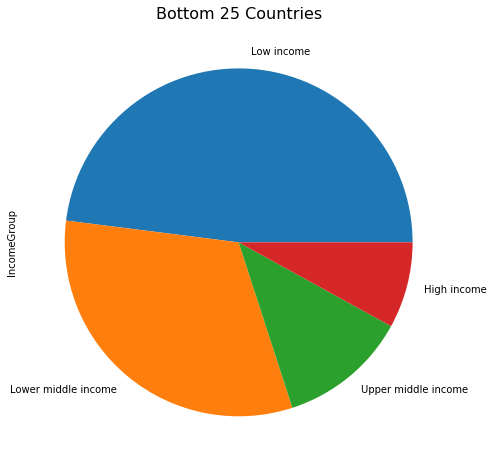

In [279]:
#Bottom 25 Countries Grouped by Income
pie = cases_per_million_bottom25[["IncomeGroup", "total_deaths_per_million"]]
pie["IncomeGroup"].value_counts().plot(kind = "pie")
plt.title("Bottom 25 Countries", size=16)

In [280]:
# groupby country name and get mean of features

cases = cases_per_million_bottom25.groupby(["Country Name","IncomeGroup"])["total_cases_per_million",
                                            "total_deaths_per_million"].mean()
cm = sns.light_palette("purple", as_cmap=True)
cases.style.background_gradient(cmap=cm)

,,total_cases_per_million,total_deaths_per_million
Country Name,IncomeGroup,,
Angola,Lower middle income,762.210000,17.404000
Benin,Lower middle income,636.796000,8.001000
Burkina Faso,Low income,632.054000,7.463000
Burundi,Low income,313.857000,0.505000
Cambodia,Lower middle income,490.042000,3.529000
Chad,Low income,288.265000,10.289000
China,Upper middle income,71.097000,3.365000
Fiji,Upper middle income,95.935000,2.231000
Haiti,Low income,1135.186000,22.013000


# Correlation of COVID-19 with Age and Comorbidities

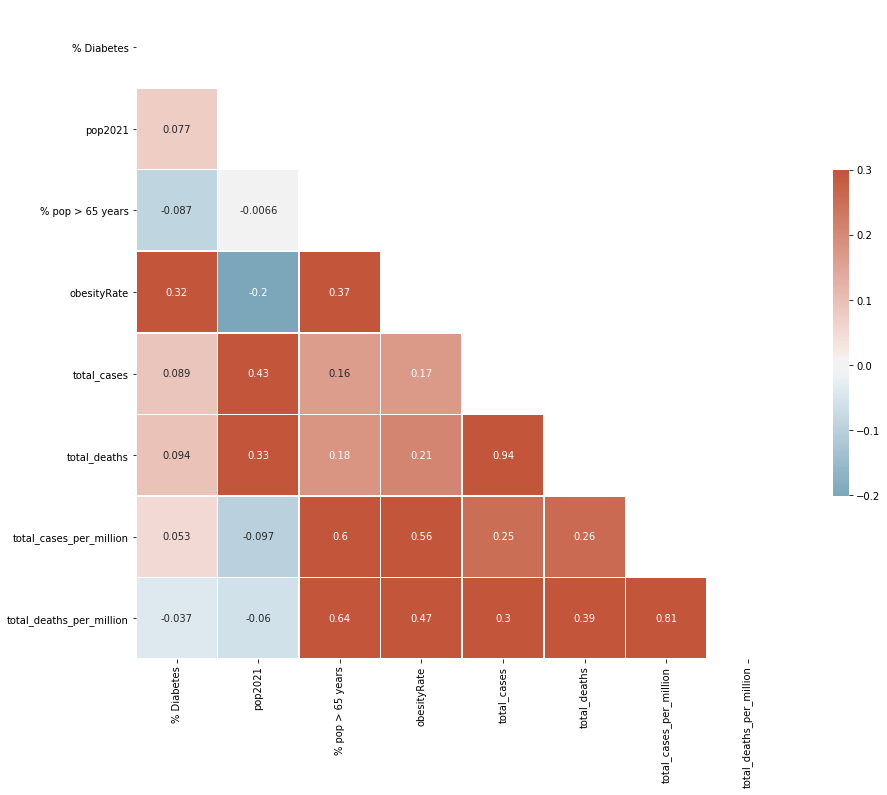

In [281]:
# Compute the correlation matrix
corr= df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize = (16,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap =True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap =cmap,annot=True, vmax =.3, center =0,
            square =True, linewidths = .5, cbar_kws= {"shrink": .5})
#plt.savefig("Heatmap.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight")

# COVID-19 Deaths, Age and Comorbidities Regression Plots

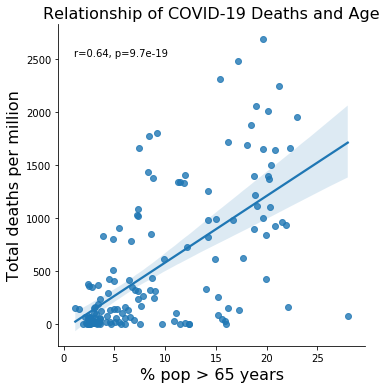

In [282]:
#sns.regplot(x="% pop > 65 years", y="total_deaths_per_million", data=gdp_df);

from scipy import stats as sp

g = sns.lmplot(x="% pop > 65 years", y="total_deaths_per_million", data=gdp_df,
               aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(gdp_df["% pop > 65 years"], gdp_df['total_deaths_per_million'])
    ax = plt.gca()
    ax.text(.05, .9,'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.xlabel("% pop > 65 years", size =16)
plt.ylabel("Total deaths per million", size =16)
plt.title("Relationship of COVID-19 Deaths and Age", size=16)
plt.show()

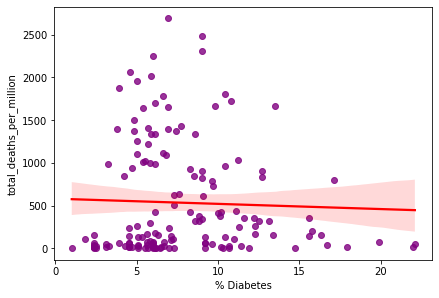

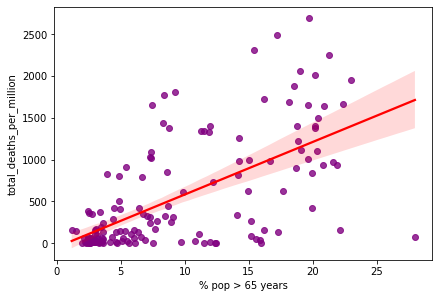

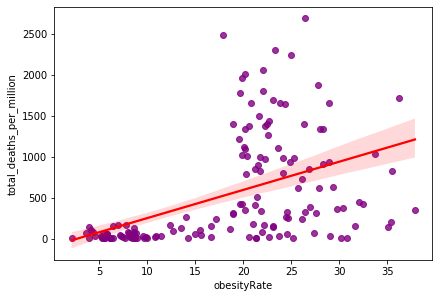

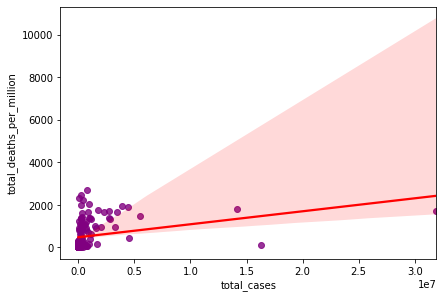

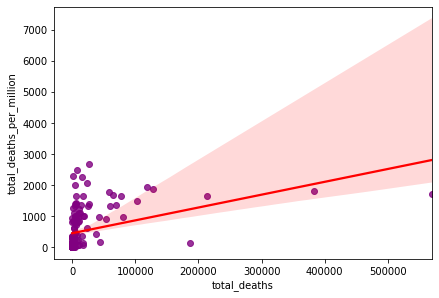

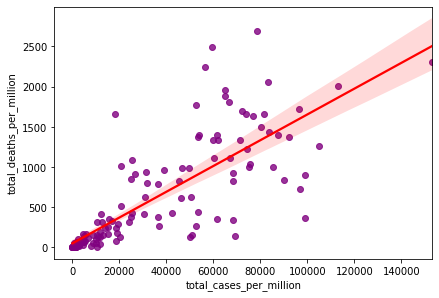

In [283]:
def regression(col): 
    
    plt.rcParams['figure.figsize'] = [8,8]
    fig = plt.figure(figsize=(17,12))
    
    ax1 = fig.add_subplot(331)

    ax1 = fig.add_subplot(331)
    sns.regplot(gdp_df[col], gdp_df["total_deaths_per_million"], scatter_kws={"color": "purple"}, line_kws={"color": "red"})
    ax1.set_xlabel(col)
    ax1.set_ylabel("total_deaths_per_million")

    
    

    #fig.colorbar(h)
    fig.tight_layout()
    plt.show()
columns = ['% Diabetes','% pop > 65 years','obesityRate', 'total_cases', 
           'total_deaths','total_cases_per_million']
for col in columns:
    regression(col)